In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Load results and fuse dataframes

In [3]:
df_rpi4 = pd.read_pickle('results/blog/rpi4_bench_results.pkl')
df_rpi5 = pd.read_pickle('results/blog/rpi5_bench_results.pkl')
df_fused = pd.concat([df_rpi4, df_rpi5])
df_fused

,t_finetune,finetune_batches,t_train,train_batches,model,num_classes,num_images,input_shape,parameters,gmacs,top1,top5,board,batch,t_train_batch,t_finetune_batch
0,78.563213,20,218.366399,20,resnet18,1000,1000,"[3, 224, 224]",11.7,1.80,69.76,89.07,RPi 4,16,10.92,3.93
1,143.772803,20,407.242998,20,resnet34,1000,1000,"[3, 224, 224]",21.8,3.68,73.31,91.42,RPi 4,16,20.36,7.19
2,330.218385,20,652.536266,20,resnet50,1000,1000,"[3, 224, 224]",35.6,4.10,78.05,93.78,RPi 4,16,32.63,16.51
3,70.816994,20,152.615578,20,mobilenetv2_050,1000,1000,"[3, 224, 224]",2.0,0.10,65.95,86.08,RPi 4,16,7.63,3.54
4,134.313158,20,305.473201,20,mobilenetv2_100,1000,1000,"[3, 224, 224]",6.1,0.60,72.97,91.02,RPi 4,16,15.27,6.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47,55.593527,20,116.132641,20,mnasnet_075,1000,1000,"[3, 224, 224]",3.2,0.21,71.18,90.50,RPi 5,16,5.81,2.78
48,69.067145,20,144.697303,20,mnasnet_100,1000,1000,"[3, 224, 224]",4.4,0.31,73.46,91.51,RPi 5,16,7.23,3.45
49,83.556503,20,188.446403,20,ghostnetv2_100,1000,1000,"[3, 224, 224]",6.2,0.20,75.17,92.35,RPi 5,16,9.42,4.18
50,118.087525,20,254.471795,20,ghostnetv2_130,1000,1000,"[3, 224, 224]",9.0,0.30,76.76,93.36,RPi 5,16,12.72,5.90


In [14]:
def make_plot(data, y_data, title, figsize=(7,5)):
    f = plt.figure(figsize=figsize)
    sns.barplot(data, x='model', y=y_data, hue='board')
    plt.xticks(rotation=70)
    plt.tight_layout()
    plt.ylabel('Seconds/batch', fontsize=14)
    plt.xlabel('')
    plt.title(title, fontsize=14)
    plt.grid()
    plt.legend(fontsize=14)
    return f

Make a barplot comparing Raspberry Pi 5 and 4 for the task of on-device finetuning.

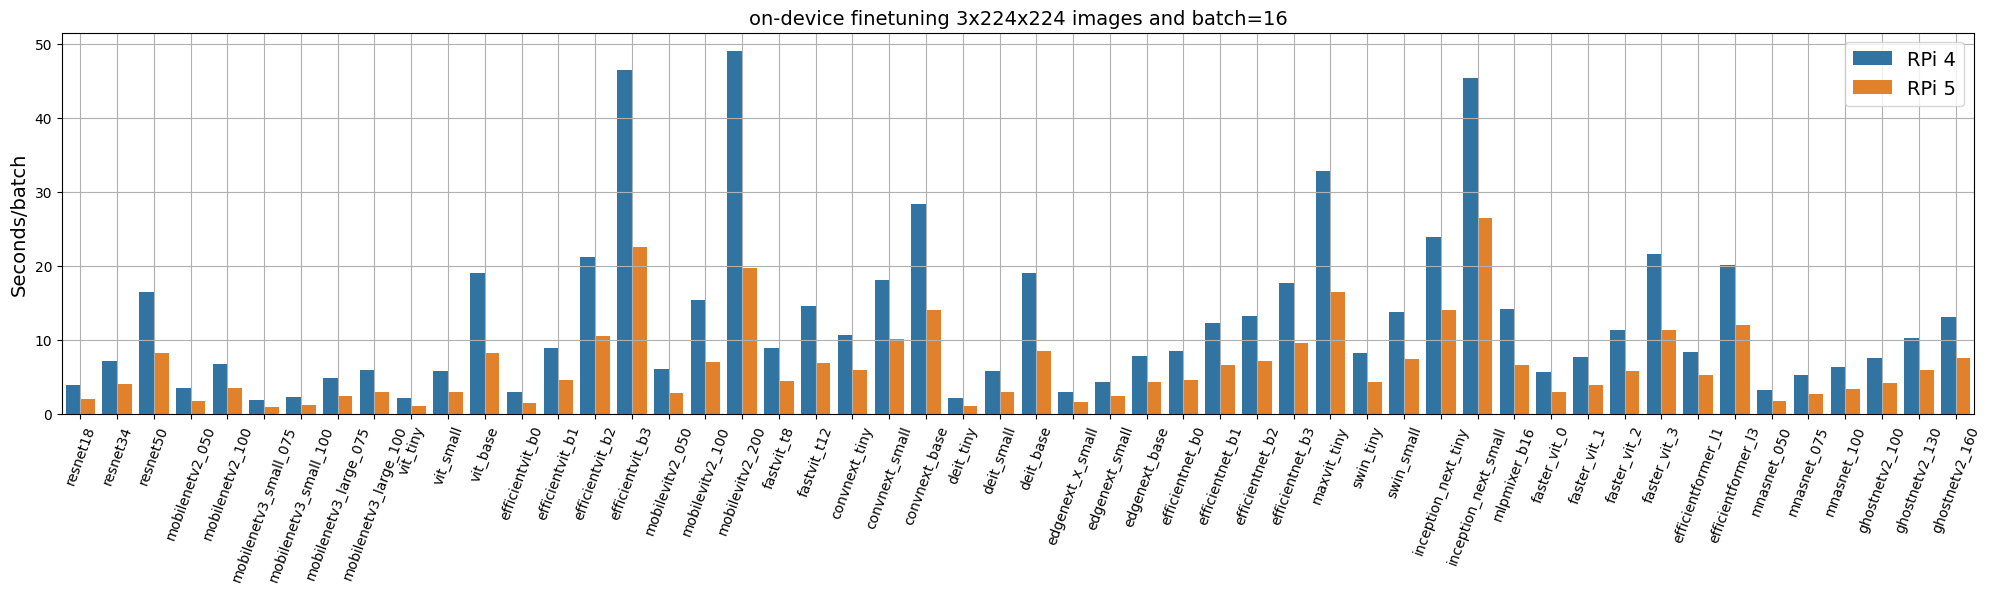

In [15]:
f = make_plot(df_fused, y_data="t_finetune_batch", title="on-device finetuning 3x224x224 images and batch=16", figsize=(20,6))

In [16]:
f.savefig('_static/bar_plot.png', format='png', pad_inches=0.2, bbox_inches="tight",)